## CISC 5325 DataBase <br>Class Project<br><br>Xinze Yang
# Global Console Game Sales Analysis

This project is to analyze global game sales data from the website **[Vgchartz](https://www.vgchartz.com/gamedb/)** to identify the most popular game series, genre and platform in the world. Moreover, we can find out the top games between these platforms and genres in order to show more detail about the interest between different kinds of gamers.


# I. Data Preparation

## 1. Data Source and Acquisition

As mentioned before, the game data is from the website. However, the website does not provide an API or a method for users to acquire their data. To get the data, I found a data mining tool on a Github created by user **[GregorUT](https://github.com/GregorUT/vgchartzScrape)**. And I changed the source code because it has not been updated in years and does not work appropriately. You can look the codes through **[here(vgchartzfull.py)](vgchartzfull.py)**.

This tool can fetch the data from the website and stroe them as a CSV file.Therefore, I got the data of the top 3000 game sales worldwide using this tool. You can see what the data looks like from **[here(ALLGAMES.csv)](ALLGAMES.csv)**.

## 2. Data Structure

In [1]:
import pandas as pd
import sqlite3
import os
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

**The DataFrame shows the structure of the data as shown below. <br> For the meaning of each column, here is their explaination:**

- `Rank`: The Rank of the sals of the game
- `Name`: Game's name
- `Platform`: The Platform game from
- `Year`: The year game released
- `Genre`: Game genre
- `Publisher`: Game publisher(Group or Company)
- `Developer`: Game developer(Group or Company)
- `Critic Score`: The average score of major game media critics reviews 
- `User Score`: The average score of users from the data website
- `NA Sales`: Game sales from North America
- `PAL Sales`: Game sales from [PAL region](https://en.wikipedia.org/wiki/PAL_region)
- `JP Sales`: Game sales from Japan
- `Other Sales`: Game sales from other rigions
- `Global Sales`: Total game sales from all rigions
- `Total Shipped`: Total game sales from retail channels
- `Grand Total`: We found that for some reason, the game sales only show one of Global Sales and Total Shipped. <br>So we use this column to show the integration of these two sets of data.

In [2]:
allGames = pd.read_csv('ALLGAMES.csv')
allGames.head()

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Shipped,Grand_Total
0,1,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.04,368.04
1,2,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.58,365.58
2,3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.00,330.00
3,4,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.00,300.00
4,5,FIFA,Series,1993.0,Sports,EA Sports,Extended Play Productions (1991-1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.40,282.40


## 3. Data Cleaning

As the DataFrame shows above, the database has lots of NaNs(Not a Number) data. So, the first step is to find whether each column has a NaN data.

In [3]:
# show the columns that have NaN value
allGames.isnull().any().to_frame()

,0
Rank,False
Name,False
Platform,False
Year,True
Genre,False
Publisher,False
Developer,False
Critic_Score,True
User_Score,True
NA_Sales,True


For each row, **True** is for column **having NaN** values, and **False** is for **no NaN** values.

As the result showing above, the column `Yeas`, all `Score` columns, all `Sales` and `Shipped` columns contain at least one NaN data.<br> Because the columns only contain numbers, it is simple to deal with the data that just replace the NaN values to 0.

In [4]:
allGames.fillna(0, inplace=True)
allGames.head()

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Shipped,Grand_Total
0,1,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.04,368.04
1,2,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.58,365.58
2,3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.00,330.00
3,4,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.00,300.00
4,5,FIFA,Series,1993.0,Sports,EA Sports,Extended Play Productions (1991-1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.40,282.40


# II. Data Analyses

In this section, we will introduce various data analyses.

## <br>1. Top Game Sales

### 1). Top Game Series

Starting with the simplest and most straightforward, we analyze the sales rank of the game series.Game series is a union which contains all generation of a certain game.<br><br>**Now, create a new DataFrame that contains only game series.**

In [5]:
series = allGames[allGames['Platform']=='Series'].reset_index(drop=True)
# The shorten columns that to be displayed
disColumns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Developer', 'Grand_Total']
series[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
0,1,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,368.04
1,2,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,365.58
2,3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,330.00
3,4,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,300.00
4,5,FIFA,Series,1993.0,Sports,EA Sports,Extended Play Productions (1991-1997),282.40
...,...,...,...,...,...,...,...,...
281,2061,Rygar,Series,0.0,Action-Adventure,Unknown,Tecmo,1.50
282,2204,1942,Series,1984.0,Shooter,Capcom,Capcom,1.40
283,2385,We Ski,Series,0.0,Sports,Unknown,Bandai Namco Studios,1.30
284,2554,Commando,Series,1985.0,Shooter,Capcom,Capcom,1.20


As the DataFrame has been ranked, the top 25 series are just the first 25 columns.<br>**So, the top 25 series are:**

In [6]:
top25Seri = series.head(25)
top25Seri[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
0,1,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,368.04
1,2,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,365.58
2,3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,330.00
3,4,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,300.00
4,5,FIFA,Series,1993.0,Sports,EA Sports,Extended Play Productions (1991-1997),282.40
5,6,Minecraft,Series,2011.0,Sandbox,Mojang,Mojang,200.00
6,8,The Sims,Series,2000.0,Simulation,Electronic Arts,Maxis,200.00
7,9,Tetris,Series,1984.0,Puzzle,Unknown,Alexey Pajitnov,171.00
8,10,Final Fantasy,Series,1987.0,Role-Playing,Square,Square,154.00
9,11,Need for Speed,Series,1994.0,Racing,Electronic Arts,EA Black Box,150.00


**And we also can show this in a way with SQL**

In [7]:
conn = sqlite3.connect('AllGames.db')
cur = conn.cursor()
allGames.to_sql('allGames', conn, if_exists='replace', index = False)
# apply changes on the database
conn.commit()

In [8]:
sql = """
select * from allGames where
Platform = 'Series';
"""
series = pd.read_sql(sql, conn)
top25Seri = series[disColumns].head(25)
top25Seri[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
0,1,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,368.04
1,2,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,365.58
2,3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,330.00
3,4,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,300.00
4,5,FIFA,Series,1993.0,Sports,EA Sports,Extended Play Productions (1991-1997),282.40
5,6,Minecraft,Series,2011.0,Sandbox,Mojang,Mojang,200.00
6,8,The Sims,Series,2000.0,Simulation,Electronic Arts,Maxis,200.00
7,9,Tetris,Series,1984.0,Puzzle,Unknown,Alexey Pajitnov,171.00
8,10,Final Fantasy,Series,1987.0,Role-Playing,Square,Square,154.00
9,11,Need for Speed,Series,1994.0,Racing,Electronic Arts,EA Black Box,150.00


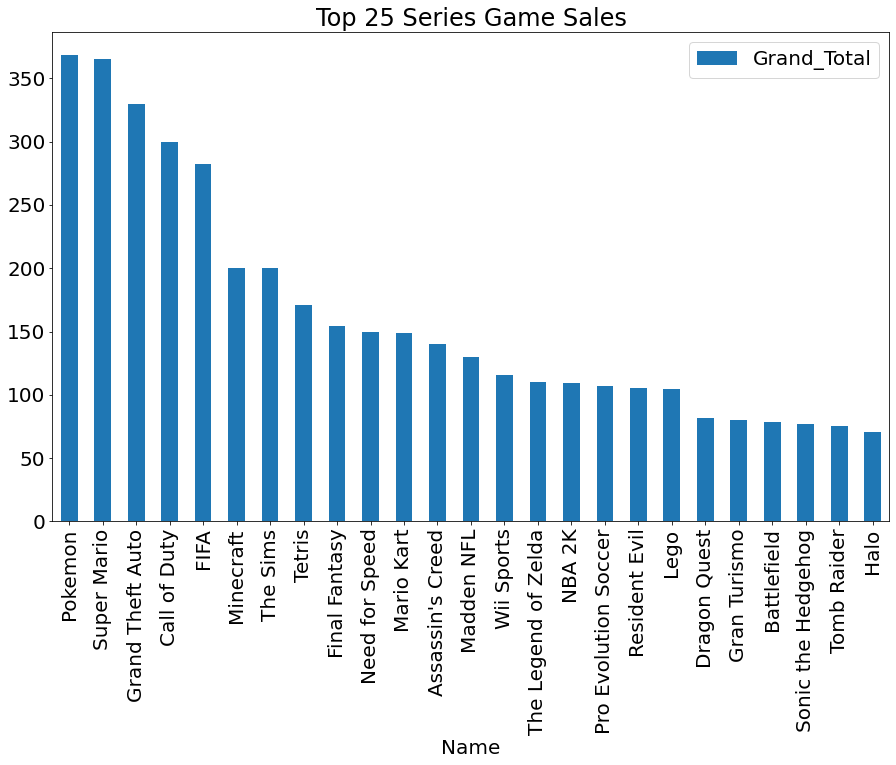

In [9]:
import matplotlib.pyplot as plt
# reset plot's figure and font size 
plt.rcParams.update({'font.size': 20, 'figure.figsize': (15, 9)})
top25Seri.plot(x='Name', y='Grand_Total', kind='bar',title='Top 25 Series Game Sales');

### <br><br> 2).Top Single Game Sales

This section we consider sales of top single games which are not series above.

**Fistly, we need to find out a list of game which are included in muilty platforms.**

In [10]:
sql = """
select * from allGames where
Platform != 'Series';
"""
single = pd.read_sql(sql, conn) # all single games
# find groups which have over one row(find games show over once)
muiltyPlatform = single.groupby('Name').filter(lambda x: len(x) > 1)['Name']
muiltyPlatform

0                           Minecraft
1                  Grand Theft Auto V
3       PlayerUnknown's Battlegrounds
8               Red Dead Redemption 2
9                           Minecraft
                    ...              
2706                    SoulCalibur V
2710          Assassin's Creed: Rogue
2711                    Madden NFL 07
2712                           Wall-E
2713                      Rock Band 2
Name: Name, Length: 1152, dtype: object

**In some multi platform games, they already have a row with total sales records such as the game shows below:**

In [11]:
# a example of Minecraft which a muilty-platform game with "All" platform data
allGames[disColumns][(allGames['Name']=='Minecraft') & ~(allGames['Platform']=='Series')]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
6,7,Minecraft,All,2011.0,Action-Adventure,Mojang,Mojang AB,200.00
76,77,Minecraft,PC,2010.0,Misc,Mojang,Mojang AB,33.15
242,243,Minecraft,X360,2013.0,Misc,Microsoft Studios,Mojang,13.00
489,490,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment,Mojang,6.33
501,502,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment America,Mojang,6.05
563,564,Minecraft,XOne,2014.0,Misc,Microsoft Studios,Mojang,5.43
1261,1262,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment America,4J Studios,2.47
1653,1654,Minecraft,NS,2018.0,Sandbox,Mojang,4J Studios,1.89
2111,2112,Minecraft,WiiU,2016.0,Misc,Mojang,4J Studios,1.47


**However, some games not contain such a row:**

In [12]:
# a example of The Legend of Zelda: Breath of the Wild which a muilty-platform game without "All" platform data
allGames[disColumns][(allGames['Name']=='The Legend of Zelda: Breath of the Wild')]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
152,153,The Legend of Zelda: Breath of the Wild,NS,2017.0,Action-Adventure,Nintendo,Nintendo EPD,19.74
1831,1832,The Legend of Zelda: Breath of the Wild,WiiU,2017.0,Action-Adventure,Nintendo,Nintendo EPD,1.69


**As a result, we need to split these two kinds of games and calculate their game sales in different ways.**

**1.For the muilti platform games with "All" row**

In [13]:
hasAll = single[(single['Platform']== 'All')
               & (single['Name'].isin(muiltyPlatform))]['Name']
hasAll

0                           Minecraft
1                  Grand Theft Auto V
3       PlayerUnknown's Battlegrounds
8               Red Dead Redemption 2
14                           Terraria
                    ...              
1933       Tom Clancy's Ghost Recon 2
1955                    SoulCalibur V
1957     Castlevania: Lords of Shadow
1970                 Final Fantasy II
2272                          DJ Hero
Name: Name, Length: 188, dtype: object

**For these kinds of games, we only consider the sales of the "All" platform as the total sales of the game.<br>Here is a result of a example**

In [14]:
# add a column 'Sum' filled with 0
single['Sum'] = 0
# apply max game sales value to 'Sum' only for the game in game list 'hasAll'
single['Sum'][single['Name'].isin(hasAll)] = single.groupby('Name')['Grand_Total'].transform(max)
single[disColumns+['Sum']][(single['Name']=='Minecraft')]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total,Sum
0,7,Minecraft,All,2011.0,Action-Adventure,Mojang,Mojang AB,200.00,200.0
9,77,Minecraft,PC,2010.0,Misc,Mojang,Mojang AB,33.15,200.0
99,243,Minecraft,X360,2013.0,Misc,Microsoft Studios,Mojang,13.00,200.0
283,490,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment,Mojang,6.33,200.0
293,502,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment America,Mojang,6.05,200.0
344,564,Minecraft,XOne,2014.0,Misc,Microsoft Studios,Mojang,5.43,200.0
991,1262,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment America,4J Studios,2.47,200.0
1375,1654,Minecraft,NS,2018.0,Sandbox,Mojang,4J Studios,1.89,200.0
1829,2112,Minecraft,WiiU,2016.0,Misc,Mojang,4J Studios,1.47,200.0


**Finaly, the total sales of these games are added to the new column "Sum"**

**2.For the muilti platform games with no "All"**

In [15]:
noAll = single[~(single['Name'].isin(hasAll))
               & (single['Name'].isin(muiltyPlatform))]['Name']
noAll

15                                       Tetris
42      The Legend of Zelda: Breath of the Wild
68                    Call of Duty: Black Ops 3
77               Call of Duty: Modern Warfare 3
89                   Call of Duty: Black Ops II
                         ...                   
2704                                    Shrek 2
2710                    Assassin's Creed: Rogue
2711                              Madden NFL 07
2712                                     Wall-E
2713                                Rock Band 2
Name: Name, Length: 590, dtype: object

**For these games, we need to add all sales from its platforms as its total sales.<br>Here is a result of a example**

In [16]:
# apply sum game sales value to 'Sum' only for the game in game list 'noAll'
single['Sum'][single['Name'].isin(noAll)] = single.groupby('Name')['Grand_Total'].transform(sum)
single[disColumns+['Sum']][(single['Name']=='The Legend of Zelda: Breath of the Wild')]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total,Sum
42,153,The Legend of Zelda: Breath of the Wild,NS,2017.0,Action-Adventure,Nintendo,Nintendo EPD,19.74,21.43
1552,1832,The Legend of Zelda: Breath of the Wild,WiiU,2017.0,Action-Adventure,Nintendo,Nintendo EPD,1.69,21.43


**3.For the non-muilti platform games**

In [17]:
nonMuilti = single['Name'][~(single['Name'].isin(muiltyPlatform))]
nonMuilti

2                             Wii Sports
4                      Super Mario Bros.
5       Counter-Strike: Global Offensive
6                         Mario Kart Wii
7          PLAYERUNKNOWN'S BATTLEGROUNDS
                      ...               
2702                        Dead Space 3
2705                        Petz: Catz 2
2707                              We Ski
2708                         Bulletstorm
2709       The Lost World: Jurassic Park
Name: Name, Length: 1562, dtype: object

**For these games, we just regard their Grand_Totals as total sales.**

In [18]:
single['Sum'][single['Name'].isin(nonMuilti)] = single['Grand_Total']

**Finally, we get all total sales of single games.**

In [19]:
single[disColumns+['Sum']].head(25)

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total,Sum
0,7,Minecraft,All,2011.0,Action-Adventure,Mojang,Mojang AB,200.00,200.00
1,14,Grand Theft Auto V,All,2013.0,Action-Adventure,Rockstar Games,Rockstar North,135.00,135.00
2,22,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo EAD,82.90,82.90
3,30,PlayerUnknown's Battlegrounds,All,2017.0,Shooter,PUBG Corporation,PUBG Corporation,70.00,70.00
4,62,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Nintendo EAD,40.24,40.24
5,64,Counter-Strike: Global Offensive,PC,2012.0,Shooter,Valve,Valve Corporation,40.00,40.00
6,67,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo EAD,37.38,37.38
7,69,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,PUBG Corporation,36.60,36.60
8,75,Red Dead Redemption 2,All,2018.0,Action-Adventure,Rockstar Games,Rockstar Studios,34.00,34.00
9,77,Minecraft,PC,2010.0,Misc,Mojang,Mojang AB,33.15,200.00


**And the "Sum" column contains no zero.**

In [20]:
single['Sum'][~(single['Sum']==0)].all()

True

**Now we can start to get the result of top single game sales.<br>Before that, we need to drop the duplicates.**

In [21]:
singleNoDup = single.drop_duplicates(['Name'], 'first')
# sort the dataframe by the comlumn 'Sum'
singleNoDup.sort_values(by='Sum', inplace=True, ascending=False)
singleTop25 = singleNoDup.head(25)

**After that, we can drow the graph.**

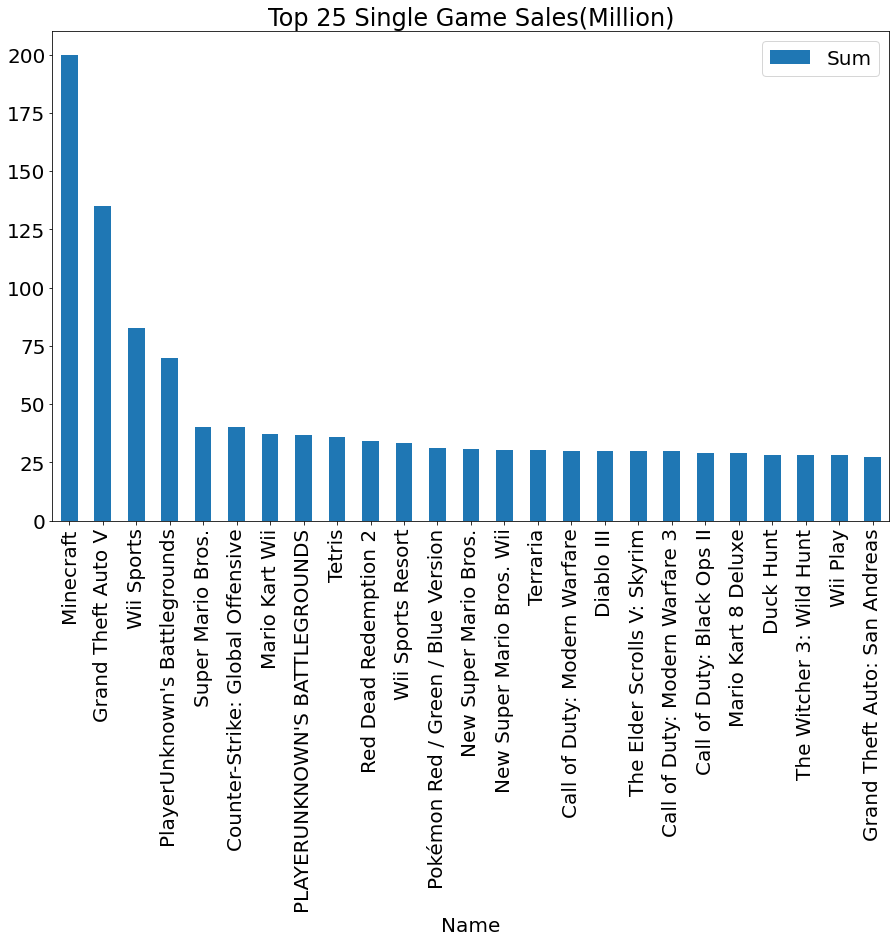

In [22]:
singleTop25.plot(x='Name', y='Sum', kind='bar',title='Top 25 Single Game Sales(Million)');

### <br><br> 3). Game Sales in Game Genres

In this section, we show the total sales, average sales for each game genre. And we can make a pie chart to show the proportions of each genre.

**Firstly, we can use the single game data above and make a groupby for each genre**

In [23]:
genreGby = singleNoDup.groupby('Genre')
genreGby.first()[disColumns[:4]+disColumns[5:]+['Sum']]

,Rank,Name,Platform,Year,Publisher,Developer,Grand_Total,Sum
Genre,,,,,,,,
Action,181,Uncharted 4: A Thief's End,PS4,2016.0,Sony Interactive Entertainment,Naughty Dog,16.25,16.25
Action-Adventure,7,Minecraft,All,2011.0,Mojang,Mojang AB,200.00,200.00
Adventure,906,LEGO Batman: The Videogame,X360,2008.0,Warner Bros. Interactive,Traveller's Tales,3.44,13.46
Fighting,132,Super Smash Bros. Ultimate,NS,2018.0,Nintendo,Bandai Namco Games,21.10,21.10
MMO,271,World of Warcraft,PC,2004.0,Blizzard Entertainment,Blizzard Entertainment,12.00,12.00
Misc,100,Wii Play,Wii,2007.0,Nintendo,Nintendo EAD,28.02,28.02
Music,463,Just Dance 4,Wii,2012.0,Ubisoft,Ubisoft,6.89,8.10
Party,117,Kinect Adventures!,X360,2010.0,Microsoft Game Studios,Good Science Studio,24.00,24.00
Platform,62,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,40.24,40.24


**As the list shows, there are 16 genre from all games.<br>Now we can get the total, average sales from each genre.**

 **<br>1.Total sales from each genre.**

In [24]:
# sum sales for each genre
genreSum = genreGby.agg({'Sum':'sum'})
genreSum.sort_values(by='Sum', inplace=True, ascending=False)
genreSum.rename(columns={'Sum':'Total sales of each genre(Million)'}, inplace=True)
genreSum

,Total sales of each genre(Million)
Genre,
Shooter,1255.85
Role-Playing,1008.77
Sports,997.72
Action-Adventure,984.84
Platform,822.94
Action,603.19
Racing,589.86
Misc,452.92
Fighting,365.68


**Also, we can do this in SQL codes:**

In [25]:
singleNoDup.to_sql('singleNoDup', conn, if_exists='replace', index = False)
sql = """
select Genre, sum(Sum)as Total_Sales_of_Each_Genre from singleNoDup
group by Genre;
"""
genreSum = pd.read_sql(sql, conn, index_col='Genre')
genreSum

,Total_Sales_of_Each_Genre
Genre,
Action,603.19
Action-Adventure,984.84
Adventure,247.88
Fighting,365.68
MMO,43.03
Misc,452.92
Music,52.23
Party,65.08
Platform,822.94


**And here is the pie plot**

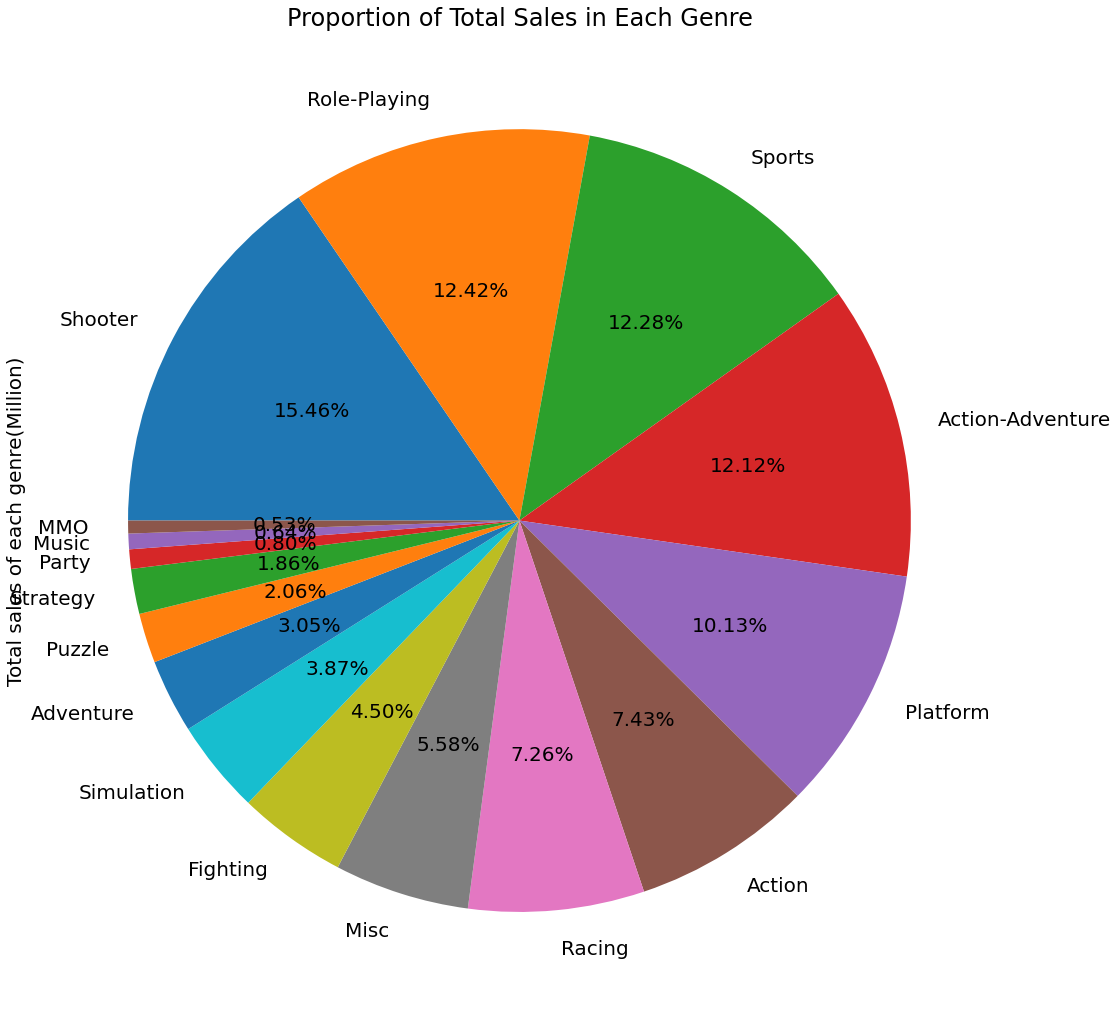

In [26]:
genreSum.rename(columns={'Total_Sales_of_Each_Genre':'Total sales of each genre(Million)'}, inplace=True)
genreSum.sort_values(by='Total sales of each genre(Million)', inplace=True, ascending=False)
genreSum.plot(x='Genre', y='Total sales of each genre(Million)', 
              kind='pie',figsize=(18,18), autopct='%.2f%%', legend=False, 
              startangle = 180, counterclock = False,
              title='Proportion of Total Sales in Each Genre');

**<br>2.Average sales from each genre.**

In [27]:
genreAvg = genreGby.agg({'Sum':'mean'})
genreAvg.sort_values(by='Sum', inplace=True, ascending=False)
genreAvg.rename(columns={'Sum':'Average sales of each genre(Million)'}, inplace=True)


**Also, we can do this in SQL codes:**

In [28]:
sql = """
select Genre, avg(Sum)as Average_Sales_of_Each_Genre from singleNoDup
group by Genre;
"""
genreAvg = pd.read_sql(sql, conn, index_col='Genre')
genreAvg.sort_values(by='Average_Sales_of_Each_Genre', inplace=True, ascending=False)
genreAvg

,Average_Sales_of_Each_Genre
Genre,
Action-Adventure,8.953091
Party,7.231111
Shooter,5.254603
Platform,4.286146
Role-Playing,4.238529
MMO,3.911818
Sports,3.882179
Racing,3.663727
Puzzle,3.407347


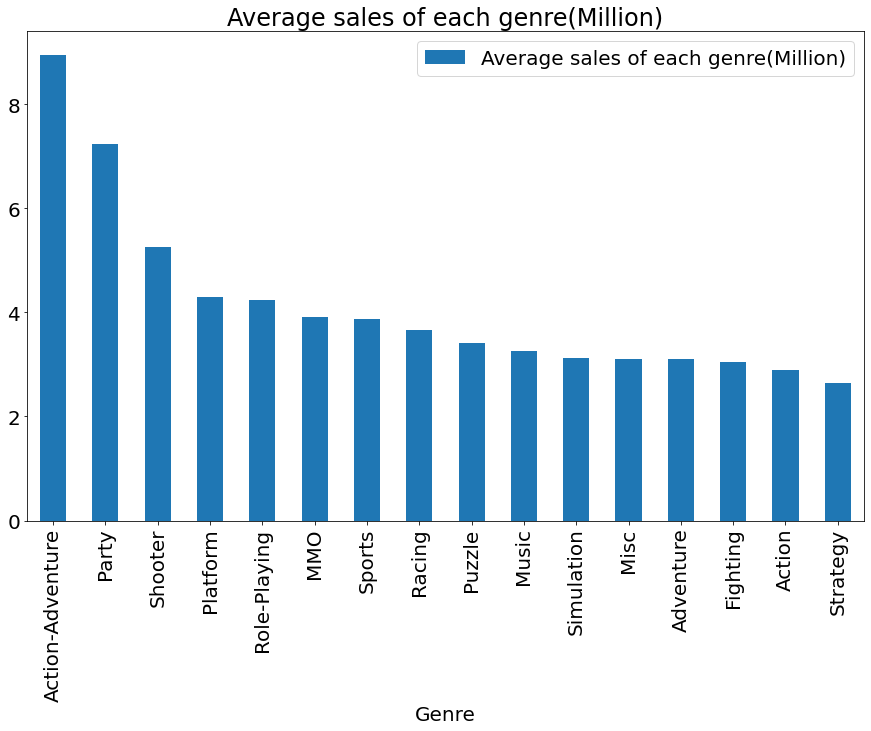

In [29]:
genreAvg.rename(columns={'Average_Sales_of_Each_Genre':'Average sales of each genre(Million)'}, inplace=True)
genreAvg.plot(kind='bar', title='Average sales of each genre(Million)');

**<br>3.The games with the highest sales in each genre.**

In [30]:
genreMax = singleNoDup
genreMax['GenreMax'] = genreGby['Grand_Total'].transform(max)
genreMax[genreMax['Grand_Total']==genreMax['GenreMax']][[ 'Name','Platform','Year','Genre','Grand_Total']]

,Name,Platform,Year,Genre,Grand_Total
0,Minecraft,All,2011.0,Action-Adventure,200.00
2,Wii Sports,Wii,2006.0,Sports,82.90
3,PlayerUnknown's Battlegrounds,All,2017.0,Shooter,70.00
4,Super Mario Bros.,NES,1985.0,Platform,40.24
6,Mario Kart Wii,Wii,2008.0,Racing,37.38
15,Tetris,GB,1989.0,Puzzle,30.26
11,Pokémon Red / Green / Blue Version,GB,1998.0,Role-Playing,31.38
22,Wii Play,Wii,2007.0,Misc,28.02
25,Animal Crossing: New Horizons,NS,2020.0,Simulation,26.04
28,Kinect Adventures!,X360,2010.0,Party,24.00


**In SQL way:**

In [31]:
sql = """
select s1.name, s1.Platform, s1.Year, s1.Genre, s1.Grand_Total from singleNoDup s1
where s1.Grand_Total = (select max(s2.Grand_Total) from singleNoDup s2
                        where s1.Genre=s2.Genre);
"""
genreMax = pd.read_sql(sql, conn)
genreMax

,Name,Platform,Year,Genre,Grand_Total
0,Minecraft,All,2011.0,Action-Adventure,200.00
1,Wii Sports,Wii,2006.0,Sports,82.90
2,PlayerUnknown's Battlegrounds,All,2017.0,Shooter,70.00
3,Super Mario Bros.,NES,1985.0,Platform,40.24
4,Mario Kart Wii,Wii,2008.0,Racing,37.38
5,Tetris,GB,1989.0,Puzzle,30.26
6,Pokémon Red / Green / Blue Version,GB,1998.0,Role-Playing,31.38
7,Wii Play,Wii,2007.0,Misc,28.02
8,Animal Crossing: New Horizons,NS,2020.0,Simulation,26.04
9,Kinect Adventures!,X360,2010.0,Party,24.00


**<br>4.The Quantity Ratio of each game genre.**

In [32]:
genreCoun = genreGby.agg({'Grand_Total':'count'})
genreCoun.sort_values(by='Grand_Total', inplace=True, ascending=False)
genreCoun.rename(columns={'Grand_Total':'Numbers of games of each genre(Million)'}, inplace=True)
genreCoun

,Numbers of games of each genre(Million)
Genre,
Sports,257
Shooter,239
Role-Playing,238
Action,208
Platform,192
Racing,161
Misc,146
Fighting,120
Action-Adventure,110


**In SQL way:**

In [33]:
sql = """
select Genre, count(*)as Number_of_Games_of_Each_Genre from singleNoDup
group by Genre;
"""
genreCoun = pd.read_sql(sql, conn, index_col='Genre')
genreCoun.sort_values(by='Number_of_Games_of_Each_Genre', inplace=True, ascending=False)
genreCoun

,Number_of_Games_of_Each_Genre
Genre,
Sports,257
Shooter,239
Role-Playing,238
Action,208
Platform,192
Racing,161
Misc,146
Fighting,120
Action-Adventure,110


**And here is the pie plot**

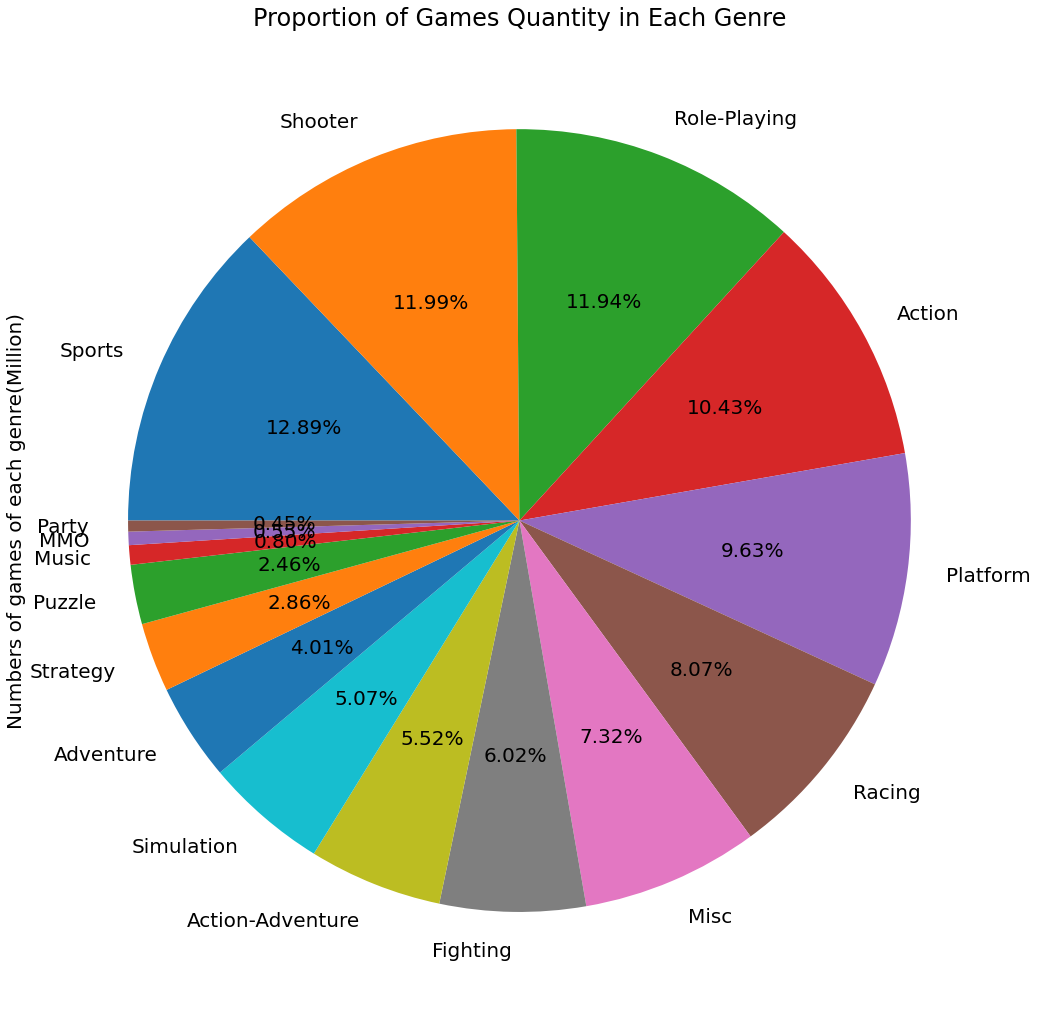

In [34]:
genreCoun.rename(columns={'Number_of_Games_of_Each_Genre':'Numbers of games of each genre(Million)'}, inplace=True)
genreCoun.plot(x='Genre', y='Numbers of games of each genre(Million)', 
              kind='pie',figsize=(18,18), autopct='%.2f%%', legend=False, 
              startangle = 180, counterclock = False,
              title='Proportion of Games Quantity in Each Genre');

### <br><br> 4). Game Sales in Game Platforms

This section will show that how the game sales in each platform and what is the top platforms with best total sales and average sales.

**Firstly, make a platform groupby and skip the row with "All" platform.**

In [35]:
platformGby = single[~(single['Platform']=='All')].groupby('Platform')
platformGby.first()[disColumns[:2]+disColumns[3:]+['Sum']]

,Rank,Name,Year,Genre,Publisher,Developer,Grand_Total,Sum
Platform,,,,,,,,
2600,422,Pac-Man,1982.0,Puzzle,Atari,Atari,7.70,8.92
3DS,164,Mario Kart 7,2011.0,Racing,Nintendo,Nintendo EAD / Retro Studios,18.92,18.92
DC,1282,Sonic Adventure,1999.0,Platform,Sega,Sonic Team,2.42,2.50
DS,85,New Super Mario Bros.,2006.0,Platform,Nintendo,Nintendo EAD,30.80,30.80
GB,81,Pokémon Red / Green / Blue Version,1998.0,Role-Playing,Nintendo,Game Freak,31.38,31.38
GBA,182,Pokémon Ruby / Sapphire Version,2003.0,Role-Playing,Nintendo,Game Freak,16.22,16.22
GBC,489,Pokémon Crystal Version,2001.0,Role-Playing,Nintendo,Game Freak,6.39,6.39
GC,433,Super Smash Bros. Melee,2001.0,Fighting,Nintendo,HAL Laboratory,7.41,7.41
GEN,208,Sonic the Hedgehog,1991.0,Platform,Sega,Sonic Team,15.00,15.00


**All the platforms are shown as the Groupby above. <br>Now we can analyse game sales between these platforms.**

**1.The total games sales of each platforms**

In [36]:
platformSum = platformGby.agg({'Grand_Total':'sum'})
platformSum.sort_values(by='Grand_Total', inplace=True, ascending=False)
platformSum.rename(columns={'Grand_Total':'Total games sales of each platform(Million)'}, inplace=True)
platformSum

,Total games sales of each platform(Million)
Platform,
PC,835.54
PS2,783.34
X360,670.64
PS3,635.94
Wii,611.17
PS4,561.84
DS,483.56
PS,451.42
NS,253.27


**We can do this again In SQL way:**

In [37]:
single.to_sql('singleGames', conn, if_exists='replace', index = False)
sql = """
select Platform, sum(Grand_Total)as Sum from singleGames where
Platform != 'All'
group by Platform;
"""
platformSum = pd.read_sql(sql,conn, index_col='Platform')
platformSum.sort_values(by='Sum', inplace=True, ascending=False)
platformSum.rename(columns={'Sum':'Total games sales of each platform(Million)'}, inplace=True)
platformSum

,Total games sales of each platform(Million)
Platform,
PC,835.54
PS2,783.34
X360,670.64
PS3,635.94
Wii,611.17
PS4,561.84
DS,483.56
PS,451.42
NS,253.27


**And here is the plot:**

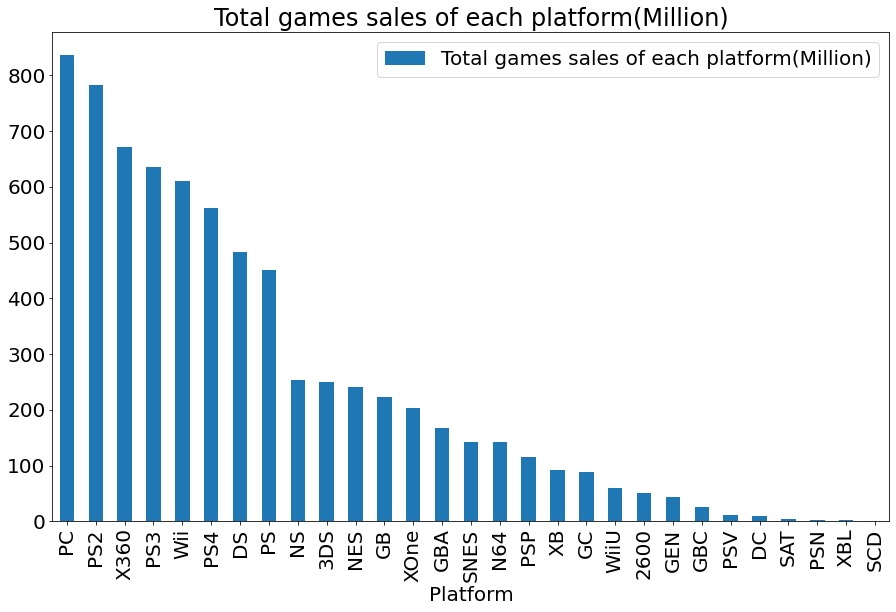

In [38]:
platformSum.plot(kind='bar', title='Total games sales of each platform(Million)');

**2.Average game sales in each platform**

In [39]:
sql = """
select platform, avg(Grand_Total)as Avg from singleGames where
Platform != 'All'
group by Platform;
"""
platformAvg = pd.read_sql(sql,conn, index_col='Platform')
platformAvg.sort_values(by='Avg', inplace=True, ascending=False)
platformAvg.rename(columns={'Avg':'Average games sales of each platform(Million)'}, inplace=True)
platformAvg

,Average games sales of each platform(Million)
Platform,
NS,6.494103
GB,4.539388
3DS,4.167167
Wii,3.892803
PS4,3.720795
PC,3.438436
GEN,3.369231
DS,3.312055
GBC,3.220000


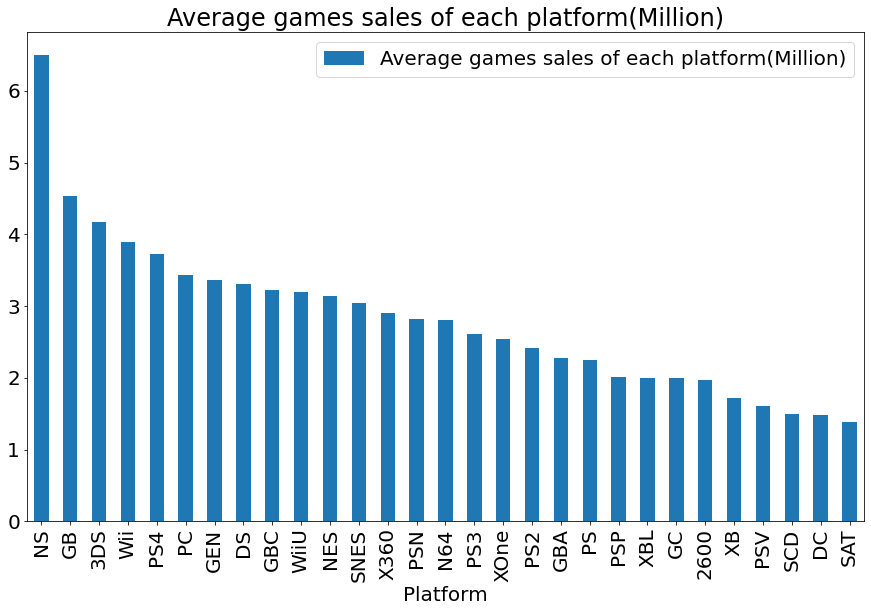

In [40]:
platformAvg.plot(kind='bar', title='Average games sales of each platform(Million)');

**3.The Quantity Ratio of each platform.**

In [41]:
sql = """
select platform, count(*)as Count from singleGames where
Platform != 'All'
group by Platform;
"""
platformCoun = pd.read_sql(sql,conn, index_col='Platform')
platformCoun.sort_values(by='Count', inplace=True, ascending=False)
platformCoun.rename(columns={'Count':'Numbers of games sales in each platform(Million)'}, inplace=True)
platformCoun

,Numbers of games sales in each platform(Million)
Platform,
PS2,324
PC,243
PS3,243
X360,231
PS,201
Wii,157
PS4,151
DS,146
XOne,80


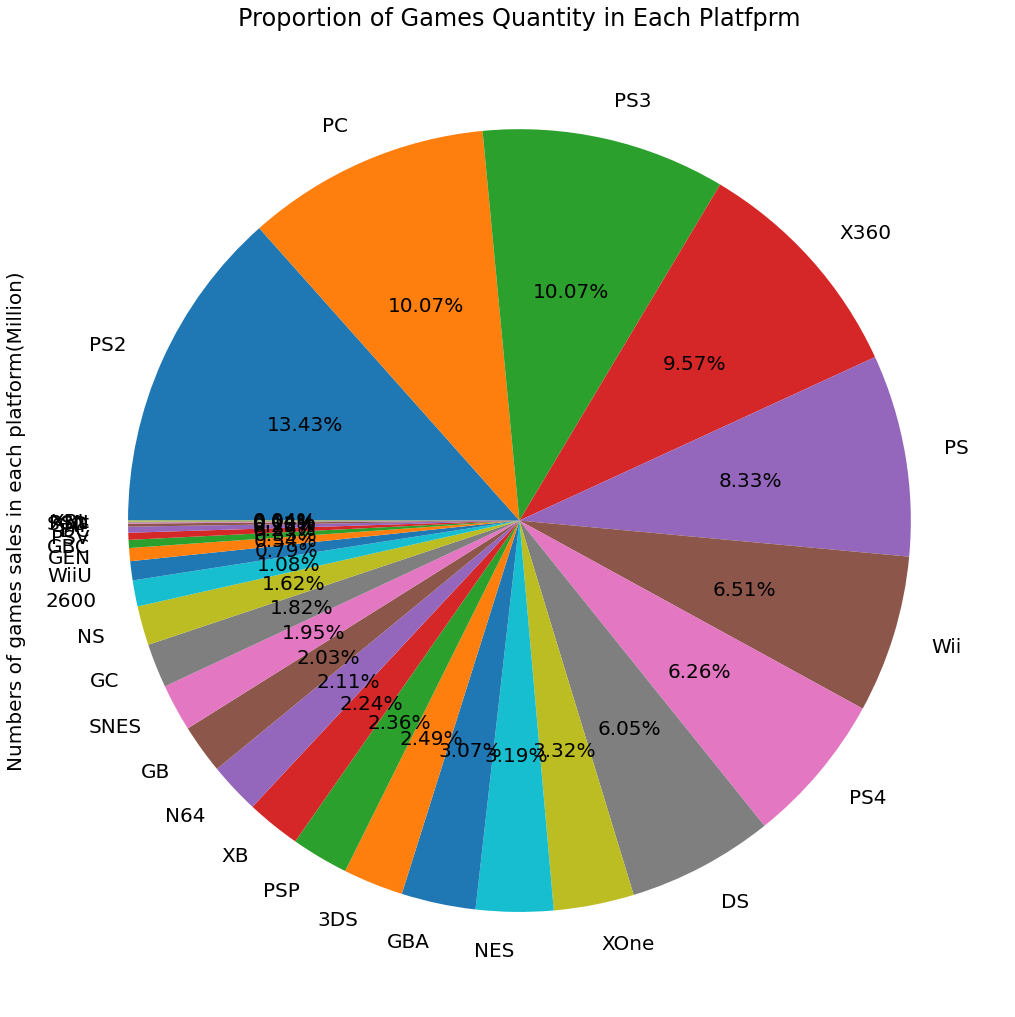

In [42]:
platformCoun.plot(x='Genre', y='Numbers of games sales in each platform(Million)', 
              kind='pie',figsize=(18,18), autopct='%.2f%%', legend=False, 
              startangle = 180, counterclock = False,
              title='Proportion of Games Quantity in Each Platfprm');

### 5). Summary

Acorrding to the results shows above we can conclude that:

- The game series with best sales in the world is `Pokemon`.
- The game with best sales in the world is `Minecraft`
- The game genre with most sales is `Shooter`
- The game genre with most average sales is `Action-Adventure`
- The platform with most game sales in history is `PC`(Persenal Computer)
- The platform with most average game sales in history is `NS`(Nintendo Switch)

## <br><br><br><br>2. Trends in Annual Game Sales

Apparently, the game sales trend is an important indicator of the future prospects of games developments.In this section, we list the average game sales, total game sales and the number of games released per year.

### 0.) Data Filtration

**One thing we need to know is that the database contains certain game duplicates on every platform, such as the example shows below:**

In [43]:
disColumns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Developer', 'Grand_Total']
allGames[disColumns][allGames['Name']=='Grand Theft Auto V']

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
13,14,Grand Theft Auto V,All,2013.0,Action-Adventure,Rockstar Games,Rockstar North,135.00
135,136,Grand Theft Auto V,PS3,2013.0,Action,Rockstar Games,Rockstar North,20.32
153,154,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,Rockstar North,19.39
191,192,Grand Theft Auto V,X360,2013.0,Action,Rockstar Games,Rockstar North,15.86
251,252,Grand Theft Auto V,PC,2015.0,Action,Rockstar Games,Rockstar North,12.60
381,382,Grand Theft Auto V,XOne,2014.0,Action,Rockstar Games,Rockstar North,8.72


**Therefore, for these kinds of games on multi platform, we need to move out the data with platform "All" because it sums the sales from every version between separate years and aggregates them to one year.**

**So, first thing, we need to get a game list which has "All" platform.**

In [44]:
allPlatformSeri = allGames['Name'][allGames['Platform']=='All'].unique()

**And their DataFrame rows.**

In [45]:
allPlatformDf = allGames[allGames['Name'].isin(allPlatformSeri)]
allPlatformDf[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
5,6,Minecraft,Series,2011.0,Sandbox,Mojang,Mojang,200.00
6,7,Minecraft,All,2011.0,Action-Adventure,Mojang,Mojang AB,200.00
7,8,The Sims,Series,2000.0,Simulation,Electronic Arts,Maxis,200.00
9,10,Final Fantasy,Series,1987.0,Role-Playing,Square,Square,154.00
12,13,Assassin's Creed,Series,2007.0,Action-Adventure,Ubisoft,Ubisoft,140.00
...,...,...,...,...,...,...,...,...
2957,2958,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,EA Canada,1.04
2972,2973,Assassin's Creed Origins,PC,2017.0,Action,Ubisoft,Ubisoft Montreal,1.03
2979,2980,Tomb Raider,PC,1996.0,Action,Eidos Interactive,Core Design Ltd.,1.03
2981,2982,Sonic Unleashed,PS3,2008.0,Platform,Sega,Sonic Team,1.03


**Then we need to make a game list that the game counts are larger than one in those "All" games.**

In [46]:
# the All platform games which show over once
allPlatformDf2 = allPlatformDf.groupby('Name').filter(lambda x: len(x) > 1)
allPlatformSeir2 = allPlatformDf2['Name'].unique()

**Finally, we can use this game lists for filtering.**

In [47]:
allGamesYear = allGames[~(allGames['Platform'] == 'Series')
                       & ~((allGames['Platform'] == 'All') & (allGames['Name'].isin(allPlatformSeir2)))]
allGamesYear[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total
21,22,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo EAD,82.90
61,62,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Nintendo EAD,40.24
63,64,Counter-Strike: Global Offensive,PC,2012.0,Shooter,Valve,Valve Corporation,40.00
66,67,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo EAD,37.38
68,69,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,PUBG Corporation,36.60
...,...,...,...,...,...,...,...,...
2995,2996,The Lost World: Jurassic Park,PS,1997.0,Action,Electronic Arts,DreamWorks Interactive,1.02
2996,2997,Assassin's Creed: Rogue,X360,2014.0,Action,Ubisoft,Ubisoft Sofia,1.02
2997,2998,Madden NFL 07,XB,2006.0,Sports,EA Sports,EA Tiburon,1.02
2998,2999,Wall-E,Wii,2008.0,Platform,THQ,Heavy Iron Studios,1.02


**Now sum the sales for these games in muilty platforms for each year.**

In [48]:
allGamesYear['Sum'] = allGamesYear.groupby(['Name','Year'])['Grand_Total'].transform(sum)
disColumns += ['Sum']
allGamesYear[disColumns][~(allGamesYear['Grand_Total'] == allGamesYear['Sum'])]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total,Sum
88,89,Tetris,GB,1989.0,Puzzle,Nintendo,Bullet Proof Software,30.26,35.84
135,136,Grand Theft Auto V,PS3,2013.0,Action,Rockstar Games,Rockstar North,20.32,36.18
152,153,The Legend of Zelda: Breath of the Wild,NS,2017.0,Action-Adventure,Nintendo,Nintendo EPD,19.74,21.43
153,154,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,Rockstar North,19.39,28.11
191,192,Grand Theft Auto V,X360,2013.0,Action,Rockstar Games,Rockstar North,15.86,36.18
...,...,...,...,...,...,...,...,...,...
2990,2991,Shrek 2,GC,2004.0,Platform,Activision,"Luxoflux, Inc.",1.02,2.88
2996,2997,Assassin's Creed: Rogue,X360,2014.0,Action,Ubisoft,Ubisoft Sofia,1.02,2.32
2997,2998,Madden NFL 07,XB,2006.0,Sports,EA Sports,EA Tiburon,1.02,4.92
2998,2999,Wall-E,Wii,2008.0,Platform,THQ,Heavy Iron Studios,1.02,2.48


**Drop duplicates**

In [49]:
allGamesYear.drop_duplicates(['Name', 'Year'], 'first', inplace=True)

**Finally, the data of a particular game looks like this:**

In [50]:
allGamesYear[disColumns][allGamesYear['Name']=='Minecraft']

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Grand_Total,Sum
76,77,Minecraft,PC,2010.0,Misc,Mojang,Mojang AB,33.15,33.15
242,243,Minecraft,X360,2013.0,Misc,Microsoft Studios,Mojang,13.00,13.00
489,490,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment,Mojang,6.33,20.28
1653,1654,Minecraft,NS,2018.0,Sandbox,Mojang,4J Studios,1.89,1.89
2111,2112,Minecraft,WiiU,2016.0,Misc,Mojang,4J Studios,1.47,1.47


**Now we can start anylization.**

### 1).  Average Sales of each year.

In [51]:
saleMeanYear = allGamesYear.groupby('Year').agg({'Sum':'mean'})
saleMeanYear = saleMeanYear[(saleMeanYear.index>0) & (saleMeanYear.index<2021)]
saleMeanYear.rename(columns={'Sum':'Average Sales(Million)'}, inplace=True)
saleMeanYear

,Average Sales(Million)
Year,
1981.0,2.317500
1982.0,2.332500
1983.0,1.395000
1984.0,1.485000
1985.0,8.320909
1986.0,1.423846
1987.0,2.531667
1988.0,2.807500
1989.0,5.137333


**Plot this DataFram:**

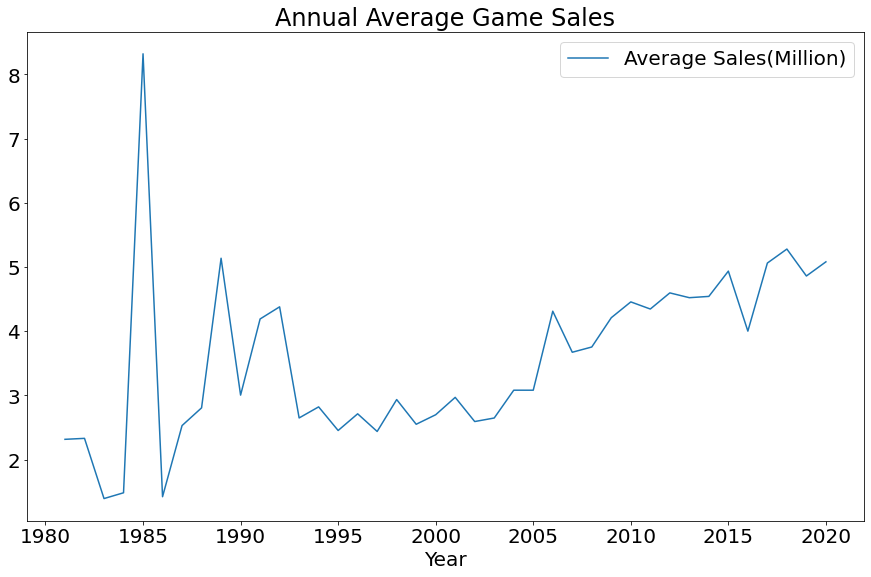

In [52]:
saleMeanYear.plot(title='Annual Average Game Sales');

### 2). Total Game Sales of each year: 

In [53]:
saleTotalYear = allGamesYear.groupby('Year').agg({'Sum':'sum'})
saleTotalYear = saleTotalYear[(saleTotalYear.index>0) & (saleTotalYear.index<2021)]
saleTotalYear.rename(columns={'Sum':'Total Sales(Million)'}, inplace=True)
saleTotalYear

,Total Sales(Million)
Year,
1981.0,9.27
1982.0,27.99
1983.0,11.16
1984.0,2.97
1985.0,91.53
1986.0,18.51
1987.0,30.38
1988.0,22.46
1989.0,77.06


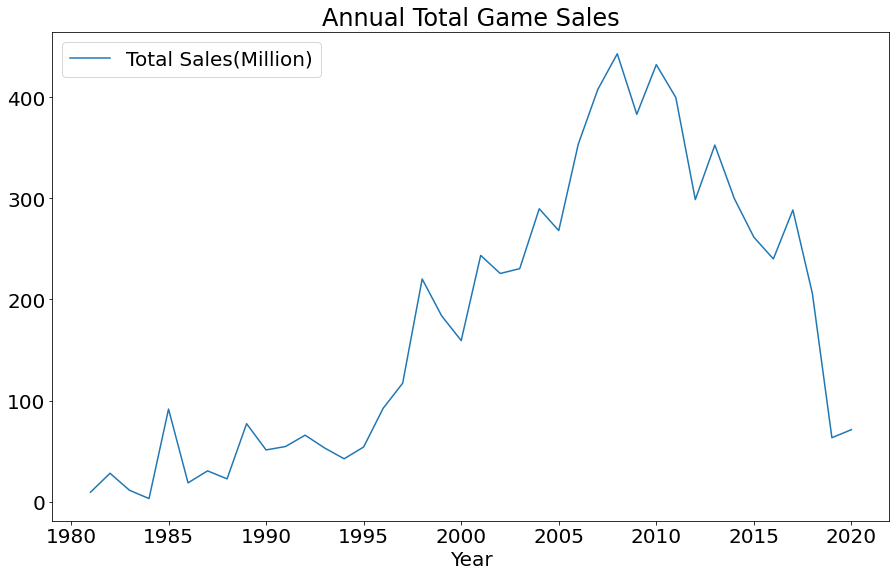

In [54]:
saleTotalYear.plot(title='Annual Total Game Sales');

### 3.) Total Numbers of Game Released of each year:

In [55]:
saleCountsYear = allGamesYear.groupby('Year').agg({'Name':'count'})
saleCountsYear = saleCountsYear[(saleCountsYear.index>0) & (saleCountsYear.index<2021)]
saleCountsYear.rename(columns={'Name':'Total Game Released(Unit)'}, inplace=True)
saleCountsYear

,Total Game Released(Unit)
Year,
1981.0,4
1982.0,12
1983.0,8
1984.0,2
1985.0,11
1986.0,13
1987.0,12
1988.0,8
1989.0,15


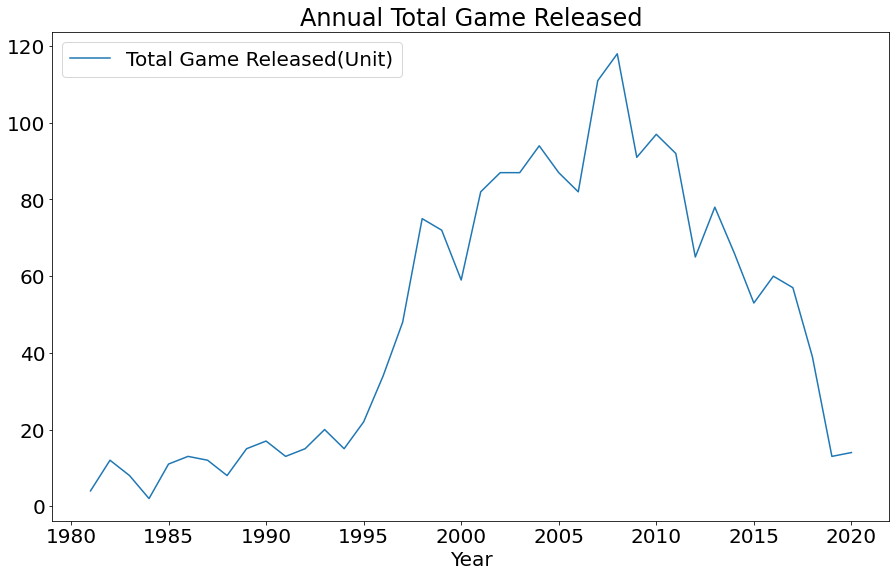

In [56]:
saleCountsYear.plot(title='Annual Total Game Released');

### Summary

As the data shown above we can conclude that:

- Annual game sales and the amount of annual game released grew gradually from the beginning until they peaked around 2008
    - However, it began to decline year by year quickly.
- The annual average game sales are growing gradually.

## <br><br><br><br>3. Relationships Between Game Sales and Game Scores.

This section we will find the relationships between game sales and game scores and the pattern between the two matters.

**Firstly, we need to make groups for the games which have critics score. In this casem we split the games into 6 groups:**

- Score`(0.0, 4.9]`
- Score`(4.9, 5.9]`
- Score`(5.9, 6.9]`
- Score`(6.9, 7.9]`
- Score`(7.9, 8.9]`
- Score`(8.9, 10]`

In [57]:
bins = [0,4.9,5.9,6.9,7.9,8.9,10]
groups = pd.cut(singleNoDup['Critic_Score'], bins=bins,labels=['0-4.9','5-5.9','6-6.9','7-7.9','8-8.9','9-10'])
scoreGby = singleNoDup.groupby(groups)
disColumns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Developer', 'Critic_Score','Grand_Total','Sum']
scoreGby.first()[disColumns]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,Grand_Total,Sum
Critic_Score,,,,,,,,,,
0-4.9,763,Carnival Games,Wii,2007.0,Misc,Global Star Software,Cat Daddy Games,4.2,4.06,6.10
5-5.9,100,Wii Play,Wii,2007.0,Misc,Nintendo,Nintendo EAD,5.9,28.02,28.02
6-6.9,117,Kinect Adventures!,X360,2010.0,Party,Microsoft Game Studios,Good Science Studio,6.7,24.00,24.00
7-7.9,22,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo EAD,7.7,82.90,82.90
8-8.9,67,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo EAD,8.2,37.38,37.38
9-10,62,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Nintendo EAD,10.0,40.24,40.24


**After this, we can now analyze the data.**

**<br>1.Average game sales in each group of score.**

In [58]:
scoreAvg = scoreGby.agg({'Sum':'mean'})
scoreAvg.rename(columns={'Sum':'Average Sales in Each Group of Score(Million)'}, inplace=True)
scoreAvg

,Average Sales in Each Group of Score(Million)
Critic_Score,
0-4.9,2.028750
5-5.9,3.203000
6-6.9,2.694270
7-7.9,3.352234
8-8.9,4.534567
9-10,5.906127


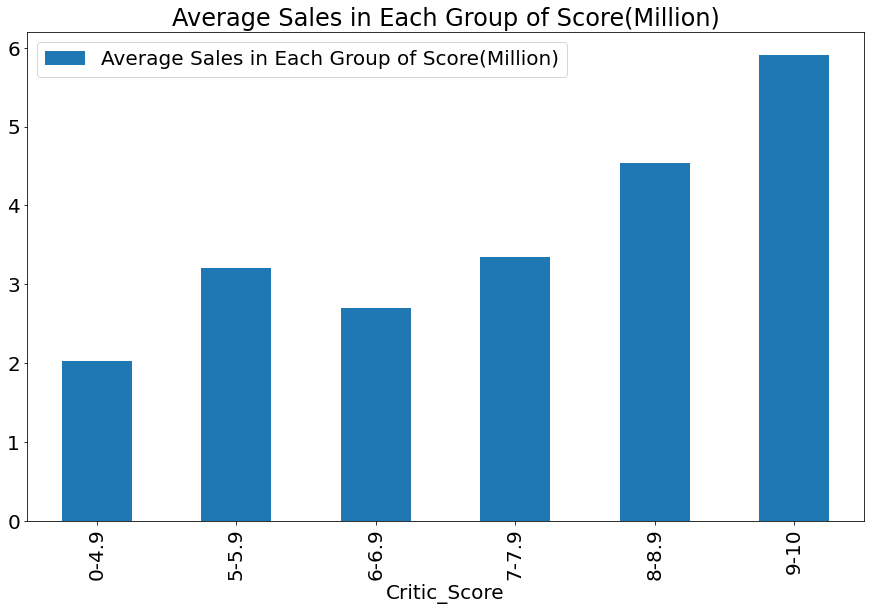

In [59]:
scoreAvg.plot(kind='bar', title='Average Sales in Each Group of Score(Million)');

**<br>2.Total game sales in each group of scores**

In [60]:
scoreTotal = scoreGby.agg({'Sum':'sum'})
scoreTotal.rename(columns={'Sum':'Total game sales in Each Group of Scores(Million)'}, inplace=True)
scoreTotal

,Total game sales in Each Group of Scores(Million)
Critic_Score,
0-4.9,32.46
5-5.9,96.09
6-6.9,239.79
7-7.9,660.39
8-8.9,1519.08
9-10,1204.85


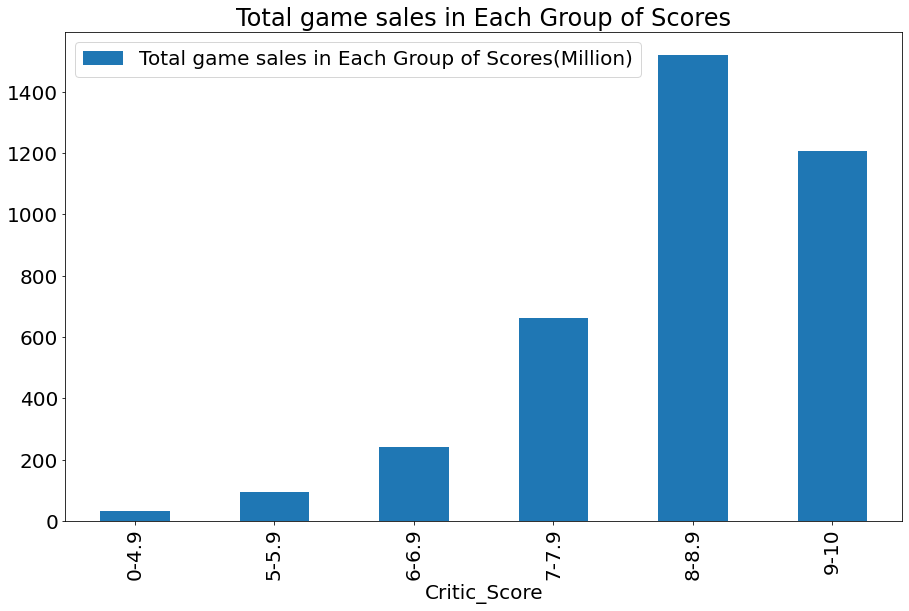

In [61]:
scoreTotal.plot(kind='bar', title='Total game sales in Each Group of Scores');

**<br>3.Numbers of games released in each group of scores**

In [62]:
scoreCount = scoreGby.agg({'Sum':'count'})
scoreCount.rename(columns={'Sum':'Numbers of Games Released in Each Group of Scores'}, inplace=True)
scoreCount

,Numbers of Games Released in Each Group of Scores
Critic_Score,
0-4.9,16
5-5.9,30
6-6.9,89
7-7.9,197
8-8.9,335
9-10,204


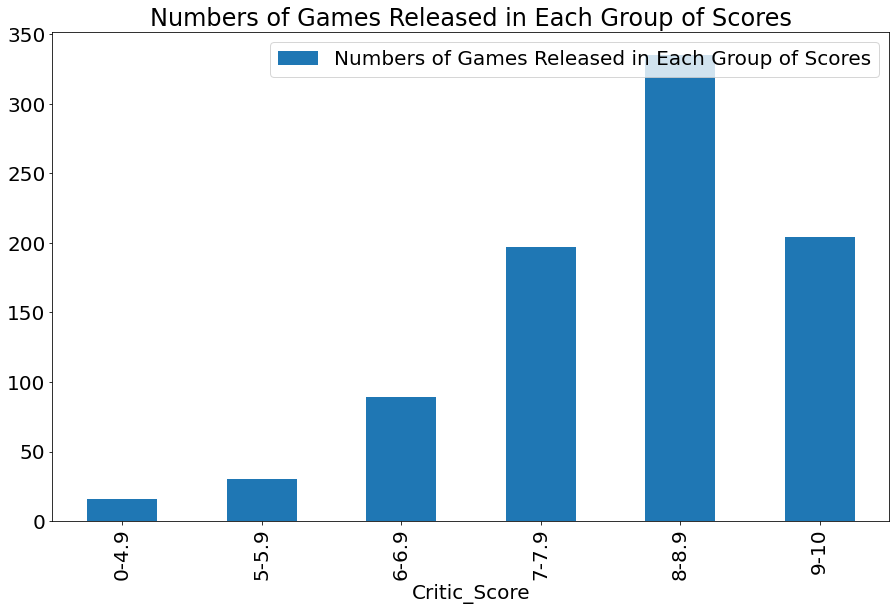

In [63]:
scoreCount.plot(kind='bar', title='Numbers of Games Released in Each Group of Scores');
conn.commit()

### Summary

- It seems that the higher score a game has, the more game sales it makes.
- The group with most total games sales is 8 to 8.9.
- Most of game are scored between 8 to 8.9. After that are games in 7 to 7.9 and 9 to 10.